In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def func(x):
    for j in range (0,n):
        if (x>=j/n and x<=(j+1)/n):
            return j

In [3]:
def fi(x, i):
    if (x>(i-1)/n and x<=i/n):
        return (x - (i-1)/n)/(i/n - (i-1)/n)
    if (x>i/n and x<(i+1)/n):
        return ((i+1)/n - x)/((i+1)/n - i/n)
    else:
        return 0

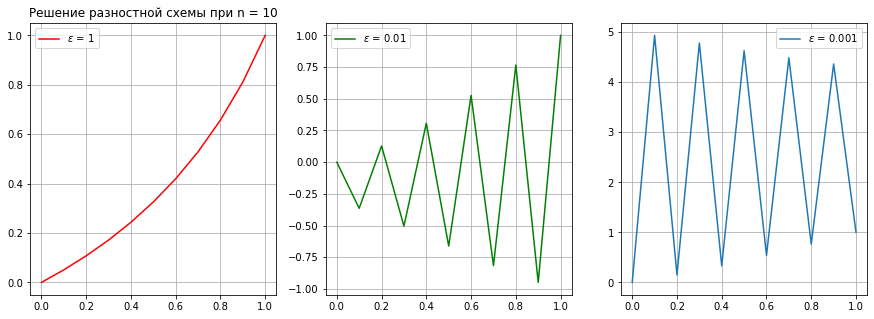

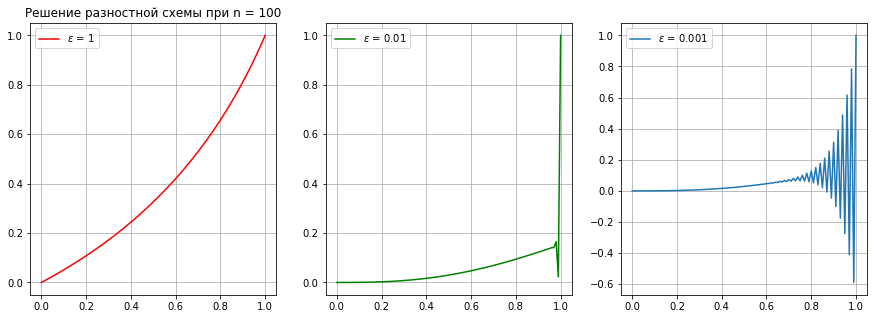

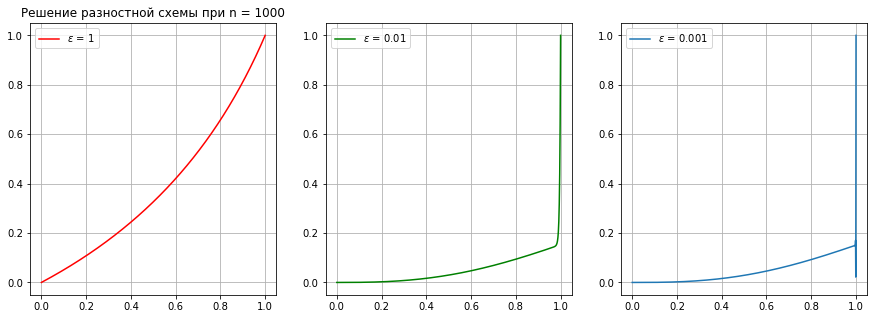

In [16]:
n = 10
# Y1 = np.zeros(15)
# Y2 = np.zeros(15)
# Y3 = np.zeros(15)
while n<=1000:
    fig = plt.figure(figsize=(15, 5))
#     fig2 = plt.figure(figsize=(15, 5))
    A = np.zeros(n-1)
    B = np.zeros(n-1)
    C = np.zeros(n-1)
    F = np.zeros(n-1)
    alpha = np.zeros(n-1)
    beta = np.zeros(n-1)
    x = np.zeros(n)
    U = np.zeros(n+1)
    X = np.zeros(n+1)
    for eps in [1, 0.01, 0.001]:
        for i in range (1, n):
            A[i-1] = -n**2 - (n**3)/eps*(math.exp(i/n)*(1/n - 1) + math.exp((i-1)/n))
            C[i-1] = -n**2 - (n**3)/eps*(math.exp(i/n)*(1/n + 1) - math.exp((i+1)/n))
            B[i-1] = 2*(n**2) + (n**3)/eps*(math.exp(i/n)*(2/n) + math.exp((i-1)/n) - math.exp((i+1)/n))
            F[i-1] = math.sin((i/n)**2)/eps
            #F[i-1] = math.pi*math.exp(i/n)*math.cos(math.pi*(i/n)/2)/eps/2+(math.pi**2)*math.sin(math.pi*(i/n)/2)/4
        F[n-2] -= C[n-2]
        A[0] = 0
        C[n-2] = 0
        alpha[0] = - C[0]/B[0]
        beta[0] = F[0]/B[0]
        for i in range (1, n-2):
            alpha[i] = - C[i]/(A[i]*alpha[i-1] + B[i])
            beta[i] = (F[i] - A[i]*beta[i-1])/(A[i]*alpha[i-1] + B[i])
        x[n-2] = (F[n-2]-A[n-2]*beta[n-3])/(B[n-2]+A[n-2]*alpha[n-3])

        i=n-3
        while i>=0:
            x[i] = alpha[i]*x[i+1] + beta[i]
            i-=1
        x[n-1] = 1
        for i in range (0, n+1):
            xi = i/n
            X[i] = xi
            k = func(xi)
            if (k>0):
                U[i] = fi(xi, k)*x[k-1] + fi(xi, k+1)*x[k]
            if (k==0):
                U[i] = fi(xi, 1)*x[0]
        r = np.sin(math.pi*X/2)
        delta=0
        for i in range (0, n+1):
            if (delta<abs(U[i]-r[i])):
                delta=abs(U[i]-r[i])
        #print(delta)
        if (eps==1):
            ax1 = fig.add_subplot(1, 3, 1)
            ax1.plot(X, U, color="red", label="$\epsilon$ = " + str(eps))
            ax1.set_title(r"Решение разностной схемы при n = " + str(n))
#             Y1[n//1000-1]=delta
#             ax11 = fig2.add_subplot(1, 3, 1)
#             ax11.plot(X, abs(U-r), color="red", label="$\epsilon$ = " + str(eps))
#             ax11.set_title(r"График модуля разности точного решения и решения разностной схемы при n = " + str(n) + "\n")
        if (eps==0.01):
            ax2 = fig.add_subplot(1, 3, 2)
            ax2.plot(X, U, color="green", label="$\epsilon$ = " + str(eps))
#             Y2[n//1000-1]=delta
#             ax22 = fig2.add_subplot(1, 3, 2)
#             ax22.plot(X, abs(U-r), color="green", label="$\epsilon$ = " + str(eps))
        if (eps==0.001):
            ax3 = fig.add_subplot(1, 3, 3)
            ax3.plot(X, U, label="$\epsilon$ = " + str(eps))
#             Y3[n//1000-1]=delta
#             ax33 = fig2.add_subplot(1, 3, 3)
#             ax33.plot(X, abs(U-r), label="$\epsilon$ = " + str(eps))
        #plt.plot(X, U-r,color="black")
        plt.grid(True)
        plt.legend()
        #string = "plot_" + str(n)
        #fig.savefig(string)
    n*=10

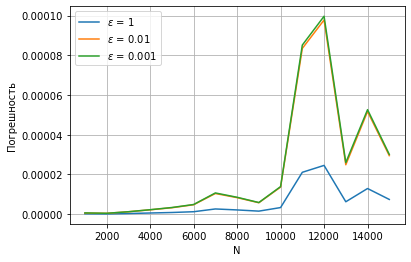

In [13]:
t1=np.copy(Y1[0:15])
t2=np.copy(Y2[0:15])
t3=np.copy(Y3[0:15])
N=[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
plt.plot(N, t1, label="$\epsilon$ = 1")
plt.plot(N, t2, label="$\epsilon$ = 0.01")
plt.plot(N, t3, label="$\epsilon$ = 0.001")
plt.xlabel("N")
plt.ylabel("Погрешность")
plt.legend()
plt.grid(True)

In [ ]:
print(Y1, Y2, Y3)